# Different sanity check codes

In [6]:
import h5py
import json
import csv
import os
import torch
import matplotlib.pyplot as plt

In [4]:
# inspecting a sinlge embeding size

#file_path = '/data_slow2/ve59kedo/UNI_AG2/h5_files/AG2_437.h5'
#file_path = '/data_slow2/ve59kedo/UNI_DSTMA_feat2_256/h5_files/DSTMA_437.h5'
file_path = '/data_slow2/ve59kedo/UNI_feat_256/h5_files/PrimaryTumor_HE_437.h5'

with h5py.File(file_path, 'r') as h5_file:
    features = h5_file['features']
    features_data = features[()]
    print(f"Mebeding size\n{features_data.shape}")


Mebeding size
(2781, 1024)


# making csv files

In [9]:


slides_directory = '/data_slow/ve59kedo/feat_sampled'
json_file_path = '/data_slow2/ve59kedo/seg/json/clinical_data.json'

slide_files = [f for f in os.listdir(slides_directory) if f.endswith('.pt')]

with open(json_file_path, 'r') as file:
    data = json.load(file)

patient_data = {item["patient_id"]: item["days_to_recurrence"] for item in data} # change as needed

csv_data = []

for slide_file in slide_files:
    patient_id_with_extension = slide_file.split('_HE_')[1]
    patient_id = patient_id_with_extension.split('.')[0]
    patient_id_base = patient_id.rstrip('a').rstrip('_') if patient_id.endswith('a') else patient_id

    label = patient_data.get(patient_id_base, "Label not found")

    case_id = f'PrimaryTumor_HE_{patient_id}'
    slide_id = case_id

    csv_data.append([case_id, slide_id, label])

with open('/data_slow2/ve59kedo/seg/json/'+'output.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['case_id', 'slide_id', 'label'])
    writer.writerows(csv_data)


# plotting the distribution of embedings sizes

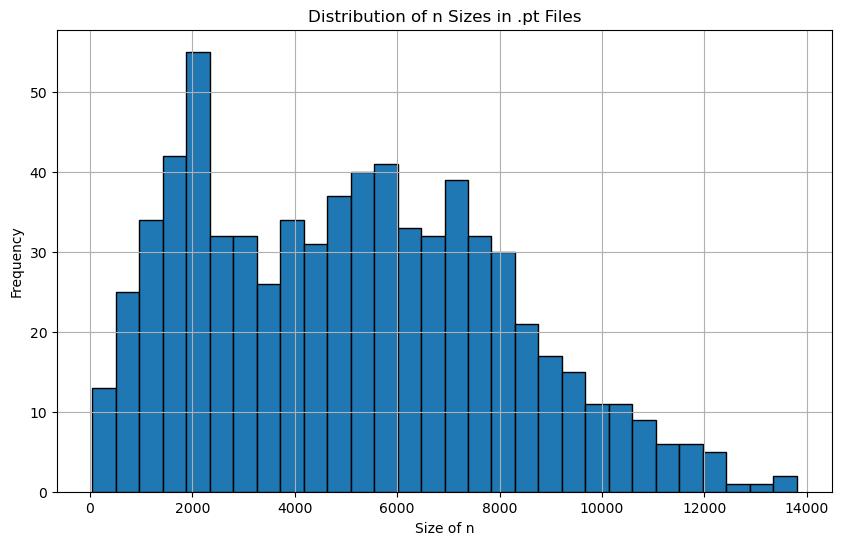

In [2]:

samples_path = '/data_slow/ve59kedo/feat_sampled_2/pt_files'

n_sizes = []

for file in os.listdir(samples_path):
    if file.endswith('.pt'):
        file_path = os.path.join(samples_path, file)
        tensor = torch.load(file_path)
        n_sizes.append(tensor.shape[0])

plt.figure(figsize=(10, 6))
plt.hist(n_sizes, bins=30, edgecolor='k')
plt.title('Distribution of n Sizes in .pt Files')
plt.xlabel('Size of n')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# for a given task how many samples we have for each class?

In [12]:
import pandas as pd

labels_csv_path = '/data/ve59kedo/thesis/clam/CLAM/dataset_csv/localization_fix.csv'
splits_csv_path = '/data/ve59kedo/thesis/results/EffNetB0_locNew_4class/exp_256k_sampled_1_s1/splits_0.csv'


splits_df = pd.read_csv(splits_csv_path)
labels_df = pd.read_csv(labels_csv_path)

melted_splits_df = splits_df.melt(id_vars=[splits_df.columns[0]], value_vars=['val', 'test'], var_name='set', value_name='slide_id')

merged_df = pd.merge(melted_splits_df, labels_df, on='slide_id')

counts = merged_df.groupby(['label', 'set']).size().unstack(fill_value=0)

print(counts)


set          test  val
label                 
Hypopharynx     8    8
Larynx         18   18
Oral_Cavity    13   13
Oropharynx     32   32


# making the csv files for the survival task

In [2]:

slides_directory = '/data_slow/ve59kedo/feat/pt_files'
json_file_path = '/data/ve59kedo/thesis/clam/seg/json/clinical_data.json'

with open(json_file_path, 'r') as file:
    data = json.load(file)
patient_data = {
    item["patient_id"]: {
        "days_to_recurrence": item.get("days_to_recurrence", ""),  # Use .get to handle missing keys
        "days_to_last_information": item.get("days_to_last_information", ""),
        "recurrence": item.get("recurrence", "")  # Assuming 'event' is the key you mentioned
    } for item in data
}

slide_files = [f for f in os.listdir(slides_directory) if f.endswith('.pt')]

csv_data = []

for slide_file in slide_files:
    patient_id_with_extension = slide_file.split('_HE_')[1]
    patient_id = patient_id_with_extension.split('.')[0]
    patient_id_base = patient_id.rstrip('a').rstrip('_') if patient_id.endswith('a') else patient_id
    patient_info = patient_data.get(patient_id_base, None)

    if patient_info:
        label = patient_info["days_to_recurrence"] if patient_info["days_to_recurrence"] else patient_info["days_to_last_information"]
        event = patient_info["recurrence"]  # Access the 'event' information
    else:
        label = "Label not found"
        event = "Event not found"

    case_id = f'PrimaryTumor_HE_{patient_id}'
    slide_id = case_id

    csv_data.append([case_id, slide_id, event, label])  

output_csv_path = '/data_slow2/ve59kedo/seg/json/output.csv'
with open(output_csv_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['case_id', 'slide_id', 'event', 'label'])  
    writer.writerows(csv_data)


# checking the atributes of a h.5 files

In [7]:

file_path = '/data/ve59kedo/thesis/clam/seg/patches/PrimaryTumor_HE_600.h5'

with h5py.File(file_path, 'r') as f:
    coords_dataset = f['coords']
    print("Attributes for 'coords':")
    for attr_name in coords_dataset.attrs:
        print(f"{attr_name}: {coords_dataset.attrs[attr_name]}")


Attributes for 'coords':
downsample: [1. 1.]
downsampled_level_dim: [110592 176128]
level_dim: [110592 176128]
name: PrimaryTumor_HE_600
patch_level: 0
patch_size: 2048
save_path: /data_slow2/ve59kedo/new_feat/patches
